# Classification and Regression with a Neural Network in Pytorch

Welcome to your first programming assignment! 
In this assignment you will build your first classification and regression neural networks.
This assignment is a 'step-through' guide to implement a simple fully-connected neural network in Pytorch.

* In the first part of this exercise, you will implement a neural network with a 2 dimensional input. Your dataset is based on a two circles-shaped groups for classification.

* Then, in the second part of this exercise, you will implement a regression model for predicting the output of a two dimensional function.

# Packages
Let's first import all the packages that you will need during this part of assignment.

Feel free to use another libraries if you want to.

In [ ]:
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import sklearn.metrics as metrics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import torch
from torch import nn,manual_seed, no_grad
from torch.optim import SGD

# from torch import nn, from_numpy, Tensor, manual_seed, no_grad

# Dataset

In [ ]:
random_num = 0
np.random.seed(random_num)
torch.manual_seed(random_num)
x, y = make_circles(500, noise=0.075)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**Visualize the dataset using matplotlib:**

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=6)


# Simple Logistic Regression

1. Implement a 2-class classification neural network with a zero hidden layer.
2. Plot loss vs epoch.
3. Plot AUC vs epoch for train and test sets.
4. Plot ROC curve and calculate AUC for the test set.
5. Plot the learned decision boundary.
6. Briefly interpret graph's results.

How you will do it:

* Prepare the Data.
* Define the Model.
* Train the Model.
* Evaluate the Model.
* Visualization.

**Define the Model:**

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, num_inputs, ):
        super(LogisticRegression, self).__init__()
        self.lin1 = nn.Linear(num_inputs, 1)

    def forward(self, x):
        return torch.sigmoid(self.lin1(x))

**Training and validation:**

In [ ]:
def data_to_tensor(x_train, x_test, y_train, y_test):
    x_train = torch.from_numpy(x_train.astype(np.float32))
    x_test = torch.from_numpy(x_test.astype(np.float32))
    y_train = torch.from_numpy(y_train.astype(np.float32))
    y_test = torch.from_numpy(y_test.astype(np.float32))

    y_train = y_train.view(y_train.shape[0], 1)
    y_test = y_test.view(y_test.shape[0], 1)
    return x_train, x_test, y_train, y_test

In [ ]:
def train_model (model,optimizer,criterion,x_train, y_train):
    model.train()
    optimizer.zero_grad()
    y_prediction = model(x_train)
    loss = criterion(y_prediction, y_train)

    loss.backward()
    optimizer.step()

    preds=y_prediction.detach().numpy()
    fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
    roc_auc = metrics.auc(fpr, tpr)
    return loss.item(), roc_auc, fpr, tpr

In [ ]:
def test_model (model,criterion,x_test, y_test):
    model.eval()
    with torch.no_grad():
        y_prediction = model(x_test)
        loss = criterion(y_prediction, y_test)
    preds = y_prediction.detach().numpy()
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    return loss.item(), roc_auc, fpr, tpr

In [ ]:
NUM_INPUTS = 2
LR = 0.01
MOMENTUM = 0.9
NUMBER_OF_EPOCHS = 1000

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = LogisticRegression(num_inputs=NUM_INPUTS)
optimizer = SGD(model.parameters(), lr=LR, momentum=MOMENTUM)
criterion = nn.BCELoss()
number_of_epochs = NUMBER_OF_EPOCHS
x_train, x_test, y_train, y_test = data_to_tensor(x_train, x_test, y_train, y_test)

train_losses = []
train_rocs = []
test_losses = []
test_rocs = []

for epoch in range(number_of_epochs):
    train_loss, train_roc_auc, fpr, tpr = train_model(model,optimizer,criterion,x_train, y_train)
    train_losses.append(train_loss)
    train_rocs.append(train_roc_auc)

    test_loss, test_roc_auc, fpr_test, tpr_test = test_model(model,criterion,x_test,y_test)
    test_losses.append(test_loss)
    test_rocs.append(test_roc_auc)

    if (epoch + 1) % 100 == 0:
        print('epoch:', epoch + 1, ',train_loss=', train_loss,'test_loss=',test_loss)





In [ ]:
# y_prediction_test = model(x_test)
# fpr, tpr, threshold = metrics.roc_curve(y_test.detach().numpy(), y_prediction_test.detach().numpy())
# roc_auc = metrics.auc(fpr, tpr)

**Visualizing the plots**:

In [ ]:
epochs = list(range(NUMBER_OF_EPOCHS))
plt.plot(epochs, train_losses,label='Train Losses')
# plt.figure(figsize=(16,8))
plt.title('Epochs Vs. Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

In [ ]:
plt.plot(epochs, train_rocs, label='Train Losses', color = 'blue')
plt.plot(epochs, test_rocs, label='Test Losses', color = 'orange')
plt.title('Epochs Vs. AUCs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [ ]:
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % test_rocs[-1], color='blue')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()
# print(roc_auc)

In [ ]:
train_auc = sum(train_rocs) / len(train_rocs)
test_auc = sum(test_rocs) / len(test_rocs)
print('train AUCs:',train_auc,'test AUCs:',test_auc)

In [ ]:
x_range = np.linspace(min(x[:, 0]), max(x[:, 0]))
y_range = np.linspace(min(x[:, 1]), max(x[:, 1]))
xx, yy = np.meshgrid(x_range, y_range)
grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
pred_func = model.forward(grid)
z = pred_func.view(xx.shape).detach().numpy()
z[z >= 0.5] = 1
z[z < 0.5] = 0
plt.contourf(xx, yy, z, cmap='RdBu')

plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Paired', s=6)
plt.show()

7. Is the decision boundary linear or nonlinear in the case of a logistic regression? Explain.

    The decision boundary is linear as we can see at the plot. M

# Classification with Neural Networks

After you implemented "classical" logistic regression, now you will be implementing a neural network with one or more hidden layers.
You will need to choose the number of hidden layers and nodes in a feedforward neural network, activation function, the type of optimizer and its hyperparmeters which will give you the best result. Remember, we don't want to overfit the training data, we want to generalize the solution for new data not seen during training.

Plot the same graphs as in the previous sections and explain the similarities and differences.

**Define the Model:**

In [ ]:
class DeepLogisticRegression(nn.Module):
    def __init__(self, num_inputs, num_neurons):
        super(DeepLogisticRegression, self).__init__()
        self.lin1 = nn.Linear(num_inputs, num_neurons)
        self.lin2 = nn.Linear(num_neurons, 1)
        self.relu = nn.ReLU()
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.lin1(x))
        x = self.sig(self.lin2(x))
        return x


**Training and validation:**

In [ ]:
NUM_INPUTS = 2
LR = 0.01
MOMENTUM = 0.9
NUMBER_OF_EPOCHS = 1000
NUM_NEURONS = 50

model = DeepLogisticRegression(num_inputs=NUM_INPUTS, num_neurons=NUM_NEURONS)
optimizer = SGD(model.parameters(), lr=LR, momentum=MOMENTUM)
criterion = nn.BCELoss()
number_of_epochs = NUMBER_OF_EPOCHS
# x_train, x_test, y_train, y_test = data_to_tensor(x_train, x_test, y_train, y_test)

train_losses = []
train_rocs = []
test_losses = []
test_rocs = []

for epoch in range(number_of_epochs):
    train_loss, train_roc_auc, fpr, tpr = train_model(model,optimizer,criterion,x_train, y_train)
    train_losses.append(train_loss)
    train_rocs.append(train_roc_auc)

    test_loss, test_roc_auc, fpr_test, tpr_test = test_model(model,criterion,x_test,y_test)
    test_losses.append(test_loss)
    test_rocs.append(test_roc_auc)

    if (epoch + 1) % 100 == 0:
        print('epoch:', epoch + 1, ',train_loss=', train_loss,'test_loss=',test_loss)


**Visualizing the plots:**

In [ ]:
### START CODE HERE ###
epochs = list(range(NUMBER_OF_EPOCHS))
plt.plot(epochs, train_losses,label='Train Losses')
# plt.figure(figsize=(16,8))
plt.title('Epochs Vs. Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

In [ ]:
plt.plot(epochs, train_rocs, label='Train Losses', color = 'blue')
plt.plot(epochs, test_rocs, label='Test Losses', color = 'orange')
plt.title('Epochs Vs. AUCs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [ ]:
plt.plot(fpr_test, tpr_test, label='ROC curve (area = %0.2f)' % test_rocs[-1], color='blue')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()
# print(roc_auc)

In [ ]:
x_range = np.linspace(min(x[:, 0]), max(x[:, 0]))
y_range = np.linspace(min(x[:, 1]), max(x[:, 1]))
xx, yy = np.meshgrid(x_range, y_range)
grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
pred_func = model.forward(grid)
z = pred_func.view(xx.shape).detach().numpy()
z[z >= 0.5] = 1
z[z < 0.5] = 0
plt.contourf(xx, yy, z, cmap='RdBu')

plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Paired', s=6)
plt.show()

8. Why does a neural network need a non-linear activation function? try to figure out what heppan when you remove the activation function and explain the results.

# Regression with Neural Networks

In this part of the excercise you will need to implement a regression model using neural networks. The model should predict the output of a trigonometric function of two variables. Your data set is based on a meshgrid. Your task is to create a list of points that would correspond to a grid and use it for the input of your neural network. Then, build your neural networks and find the architecture which gives you the best results.
1. Plot the surface from the overall data and compare it to your predicted test sets.
2. Which loss function and validation metric did you choose?
3. Plot the loss and validation metrics vs epoch for the training and test sets.
4. Build a new neural network and try overfitting your training set. Show the overfitting by using learning curve plots. 
    **Note**: You can use plt.ylim() function to better focus on the changes in the trends.

# Packages 

First import all the packages that you will need during this part of assignment.

Feel free to use another libraries if you want to.

In [1]:
from typing import Tuple, List, Dict
import numpy as np
from numpy.typing import NDArray
from torch import nn, from_numpy, Tensor, manual_seed, no_grad
import matplotlib.pyplot as plt
from torch.optim import SGD, Optimizer
from sklearn.model_selection import train_test_split

**Generate data:**

In [ ]:
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])



**Helper functions:**

In [2]:
def grid(scale_x: Tuple[int, int], scale_y: Tuple[int, int]) -> Tuple[NDArray, NDArray]:
    x = np.linspace(*scale_x, 30)
    y = np.linspace(*scale_y, 30)
    xx, yy = np.meshgrid(x, y)
    return xx, yy


def trigo_function(x1, x2):
    return np.sin(x1) * np.cos(x2) + 0.1 * np.random.rand(x1.shape[0], x1.shape[1])


def generate_data() -> Tuple[Tuple, NDArray]:
    plane = grid((-5, 5), (-5, 5))
    fx = trigo_function(*plane)
    return plane, fx


data = generate_data()


def vectorize_data(x: NDArray, y: NDArray, z: NDArray) -> Tuple[NDArray, NDArray]:
    xx = x.reshape(-1, 1)
    yy = y.reshape(-1, 1)
    input_data = np.hstack((xx, yy))
    return input_data, z.reshape(-1, 1)


def convert_to_tensor(array: NDArray):
    return from_numpy(array.astype(np.float32))


def viz_data(x: NDArray, y: NDArray, z: NDArray, show: bool = True):
    plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(x, y, z, color='b', alpha=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(60, 35)
    if show:
        plt.show()
    return ax


def viz_preds(data, preds):
    x, fx = vectorize_data(*data[0], data[1])
    x_train, x_test, y_train, y_test = train_test_split(x, fx, test_size=0.3, random_state=1)
    ax = viz_data(*data[0], data[1], show=False)
    ax.scatter(x_test[:, 0], x_test[:, 1], preds, color='r')
    plt.show()



**Define the Model:**

In [3]:

class RegressionModel(nn.Module):
    def __init__(self, num_inputs: int, num_neurons: List):
        super().__init__()
        self.lin1 = nn.Linear(num_inputs, num_neurons[0])
        self.lin2 = nn.Linear(num_neurons[0], num_neurons[1])
        self.lin3 = nn.Linear(num_neurons[1], 1)

        self.relu = nn.LeakyReLU()
        self.tanh = nn.Tanh()

    def forward(self, x: Tensor):
        x = self.relu(self.lin1(x))
        x = self.tanh(self.lin2(x))
        x = self.tanh(self.lin3(x))
        return x



**Training and validation:**

In [4]:

def train_model(
        model: nn.Module,
        optimizer: Optimizer,
        loss_fn: nn.MSELoss,
        x_train: Tensor, y_train: Tensor
) -> Tensor:
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()
    return loss


def test_model(model: nn.Module, x_test: Tensor, y_test: Tensor, loss_fn: nn.MSELoss) -> Tuple[Tensor, Tensor]:
    model.eval()
    with no_grad():
        y_pred = model(x_test)
        loss = loss_fn(y_pred, y_test)
    return loss, y_pred.ravel()


def run_model(model: nn.Module, data: Tuple[Tuple, NDArray], num_of_epochs: int) -> [List, List, Dict]:
    lr = 0.1
    momentum = 0.9
    train_losses = []
    test_losses = []
    loss_function = nn.MSELoss()
    optimizer = SGD(model.parameters(), lr=lr, momentum=momentum)
    x, fx = vectorize_data(*data[0], data[1])
    x_train, x_test, y_train, y_test = map(convert_to_tensor, train_test_split(x, fx, test_size=0.3, random_state=1))
    pred = np.array([1])
    for epoch in range(num_of_epochs):
        train_loss = train_model(model, optimizer, loss_function, x_train, y_train)
        test_loss, test_pred = test_model(model, x_test, y_test, loss_function)
        train_losses.append(train_loss.item())
        test_losses.append(test_loss.item())
        pred = test_pred.detach().numpy()
        if (epoch + 1) % 1000 == 0:
            print('epoch:', epoch + 1, ',train_loss =', train_loss.item())
            print('epoch:', epoch + 1, ',test_loss =', test_loss.item())
        # validation usage
    return train_losses, test_losses, dict(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, pred=pred)


regression_model = RegressionModel(2, [20, 30])

train_losses, test_losses, splited_data = run_model(model=regression_model, data=data, num_of_epochs=1000)



epoch: 1000 ,train_loss = 0.0058814845979213715
epoch: 1000 ,test_loss = 0.010444804094731808


**Visualizing the plots:**

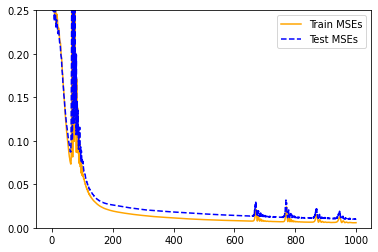

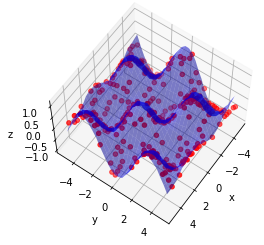

In [5]:
def viz_epochs(num_of_epochs: int,
               other_axis: list,
               plot_test: bool,
               y_lim: tuple
               ):
    epochs = list(range(num_of_epochs))
    plt.plot(epochs, other_axis[0], 'orange', label='Train MSEs')
    if plot_test:
        plt.plot(epochs, other_axis[1], 'blue', label='Test MSEs', linestyle='--')
    plt.ylim(list(y_lim))
    plt.legend()
    plt.show()


viz_epochs(num_of_epochs=1000, other_axis=[train_losses, test_losses], plot_test=True, y_lim=(0, 0.25))

viz_preds(data, splited_data['pred'], )


### Build a new neural network and try overfitting your training set

**Generate data:**

In [ ]:
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

**Define the Model:**

In [6]:
class OverfitModel(nn.Module):
    def __init__(self, num_inputs: int, num_neurons: list):
        super().__init__()
        self.lin1 = nn.Linear(num_inputs, num_neurons[0])
        self.lin2 = nn.Linear(num_neurons[0], num_neurons[1])
        self.lin3 = nn.Linear(num_neurons[1], num_neurons[2])
        self.lin4 = nn.Linear(num_neurons[2], 1)

        self.relu = nn.RReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.relu(self.lin1(x))
        x = self.tanh(self.lin2(x))
        x = self.tanh(self.lin3(x))
        x = self.tanh(self.lin4(x))
        return x


**Training and validation:**

In [7]:
epochs = 100000
overfit_model = OverfitModel(2, [30, 50, 70])

train_losses, test_losses, splited_data = run_model(model=regression_model, data=data, num_of_epochs=epochs)


epoch: 1000 ,train_loss = 0.003984169568866491
epoch: 1000 ,test_loss = 0.006987329106777906
epoch: 2000 ,train_loss = 0.002444083336740732
epoch: 2000 ,test_loss = 0.004259689245373011
epoch: 3000 ,train_loss = 0.001953383907675743
epoch: 3000 ,test_loss = 0.003474364522844553
epoch: 4000 ,train_loss = 0.0017235479317605495
epoch: 4000 ,test_loss = 0.0030869985930621624
epoch: 5000 ,train_loss = 0.0030182681512087584
epoch: 5000 ,test_loss = 0.004554002080112696
epoch: 6000 ,train_loss = 0.0014485744759440422
epoch: 6000 ,test_loss = 0.00273812934756279
epoch: 7000 ,train_loss = 0.0013263628352433443
epoch: 7000 ,test_loss = 0.0026150615885853767
epoch: 8000 ,train_loss = 0.0033231943380087614
epoch: 8000 ,test_loss = 0.004435628652572632
epoch: 9000 ,train_loss = 0.0012423543957993388
epoch: 9000 ,test_loss = 0.0025541249196976423
epoch: 10000 ,train_loss = 0.0011964209843426943
epoch: 10000 ,test_loss = 0.002545921830460429
epoch: 11000 ,train_loss = 0.001193493721075356
epoch: 1100

**Visualizing the plots:**

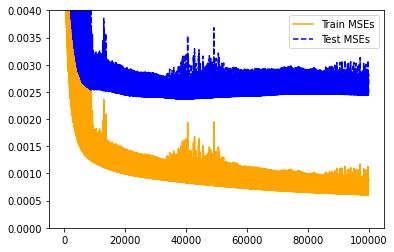

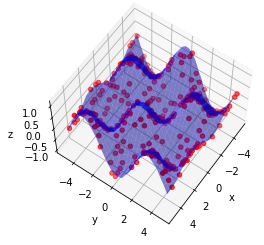

In [8]:
viz_epochs(num_of_epochs=epochs, other_axis=[train_losses, test_losses], plot_test=True, y_lim= (0.0, 0.004))

viz_preds(data, splited_data['pred'], )


5. Briefly explain graph's results.

6. How does your metric value differs between the training data and the test data and why?
